In [38]:
import math
import re
import pandas as pd
#pd.options.display.max_rows = 10
import numpy as np
import sklearn as sk
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.model_selection import train_test_split as tts

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 8]

In [39]:
data = pd.read_csv('data.csv')
data = data.drop(['Unnamed: 0', 'ingredients'], axis=1)
#data.loc[data['total_pack_size_ml_g'].isnull(), 'total_pack_size_ml_g'] = data['unit_pack_size_ml_g']
data = data.dropna()
print(data.shape)
data.head()


(14834, 5)


,country,company,total_pack_size_ml_g,unit_pack_size_ml_g,price_per_100g_ml_dollars
0,Vietnam,Brand 0,130.0,130.0,0.32
1,Brazil,Brand 1,90.0,90.0,1.22
2,Vietnam,Brand 2,120.0,120.0,1.26
3,UK,Brand 3,100.0,100.0,4.92
4,Thailand,Brand 4,160.0,160.0,0.79


In [40]:
mean_price = data.groupby('country')['price_per_100g_ml_dollars'].mean()
data['country'] = data['country'].transform(lambda x: mean_price[x])

mean_price = data.groupby('company')['price_per_100g_ml_dollars'].mean()
data['company'] = data['company'].transform(lambda x: mean_price[x])

In [41]:
X = data.drop('price_per_100g_ml_dollars', axis=1)
y = data['price_per_100g_ml_dollars']

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.25, random_state=0)

r^2 = 0.7494966906910946


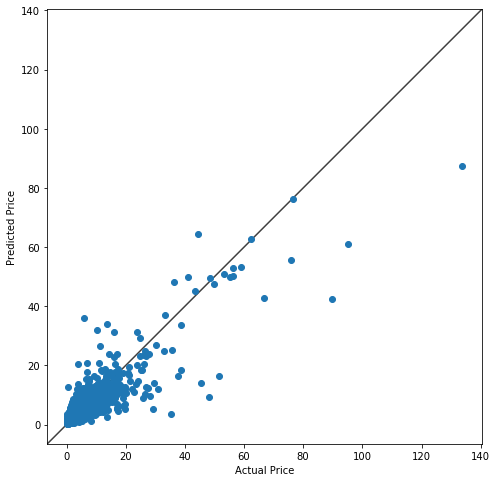

In [44]:
model = GradientBoostingRegressor(n_estimators=500, max_depth=4, min_samples_split=2, learning_rate=0.01, loss='ls')
model.fit(X_train, y_train)

fig, ax = plt.subplots()
ax.scatter(y_test, model.predict(X_test))

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.set_xlabel('Actual Price')
ax.set_ylabel('Predicted Price')

print("r^2 = %s" % model.score(X_test, y_test))